This analysis focuses on identifying the most crucial elements for successful cross-selling new subscription to clients. A model to determine if a consumer will effectively cross-sell is included in this investigation.

In [90]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy             as np                       # Linear Algebra 

# Machine Learning Modules
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from io import StringIO
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# specifying the path and file name
file = './Cross_Sell_Success_Dataset_2023.xlsx'

# reading the file into Python
cs = pd.read_excel(io = file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

#obtaining the top 10 rows as output to enhance data understanding
cs.head(n = 10)


,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,0,rollam.westerling@jnj.com,2917.5,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,0,utt@passport.com,3901.5,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,0,bandy@aol.com,5000.0,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,1,rickard.karstark@live.com,3090.0,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,1,androw.frey@protonmail.com,5745.0,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


After loading the libraries, I will read the Excel file into Python from the working directory. Set pandas print parameters to make sure I can produce and examine data on all variables, not just the first few and the final few. After loading the file, I will examine the dataset's structure, variable types, and other details to get a first impression.

In [2]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [3]:
#Finding the dataset's missing or null values
cs.isna().sum()

CROSS_SELL_SUCCESS             0
EMAIL                          0
REVENUE                        0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
CANCELLATIONS_AFTER_NOON       0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
LATE_DELIVERIES                0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
AVG_MEAN_RATING                0
TOTAL_PHOTOS_VIEWED            0
dtype: int64

The dataset contains no missing values. Next, I will analyze the descriptive statistics of each numeric variable.

In [4]:
#defining and evaluating every numerical column
cs.describe().round(2)

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,0.47,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,0.00,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,0.00,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1.00,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,1.00,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,1.00,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


I noticed some intriguing findings based on the results:
    
The top 25% of consumers earn significantly more revenue than the other 75%. 75% of Apprentice Chef's clients produce income ranging from 131 to 2670. Between 2670 and 8800 is generated by the top 25% of clients. This is a wide range, and in light of this data, I infer that in addition to individual users, we may also have corporate consumers for whom we fulfill substantial orders. If this were a real-world scenario, I would carefully research our clientele. This is a project, so keeping that in mind is already a noteworthy remark.  

Also, there is an exponential gap between the number of meals ordered by the top 25% of clients and the rest. As this is an experiment rather than a real-world job, I lack the tools to examine Apprentice Chef's clientele thoroughly. However, this finding supports my initial hypothesis that the organization has individual and corporate clients based on the distribution of values in the "REVENUE" column. The average number of meals ordered is 75, while clients in the third quartile order about 95. As compared to clients in the 75th percentile, the top 25% of customers order up to 493 meals. In conclusion, we have both individuals and businesses as customers.

In [5]:
#Details on each variable
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

In [6]:
# finding the correlation between the cross-sell success and the rest of the fields
df_corr = cs.corr(method = 'pearson').round(decimals=2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TOTAL_MEALS_ORDERED            0.01
AVG_PREP_VID_TIME              0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

Create histograms to examine the distribution of each continuous variable.

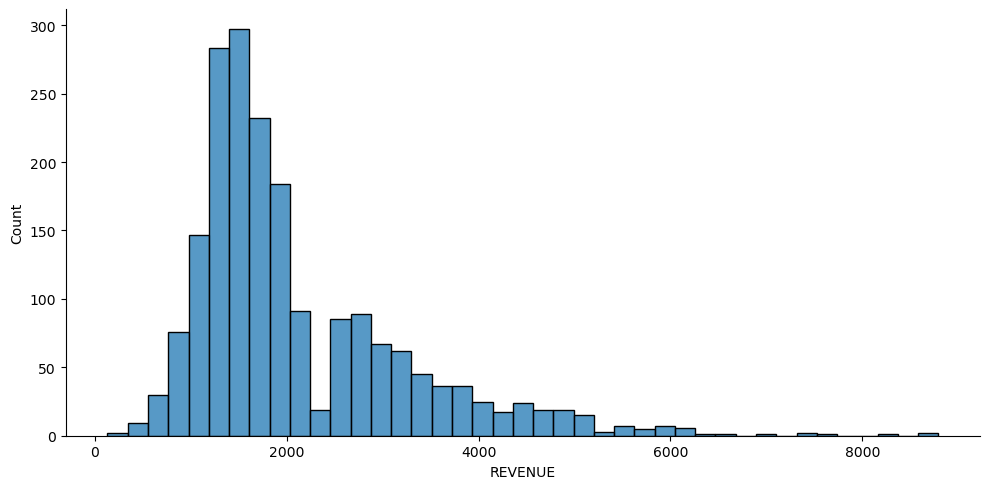

In [7]:
# developing a histogram using DISPLOT
sns.displot(data   = cs,
           x       = 'REVENUE',
           height  = 5,
           aspect  = 2)

# displaying the histogram
plt.show()

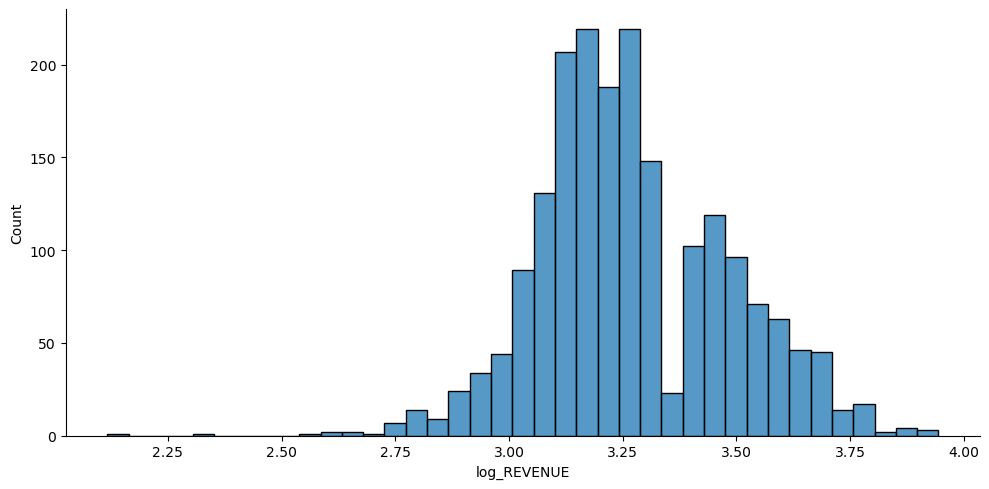

In [8]:
# log transforming REVENUE and saving it to the dataset
cs['log_REVENUE'] = np.log10(cs['REVENUE'])

# developing a histogram using DISPLOT for REVENUE after log transformation
sns.displot(data   = cs,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

The first finding from the distribution is that revenue is favorably skewed. The revenue variable tends to become more regularly distributed after log transformation than the raw data.

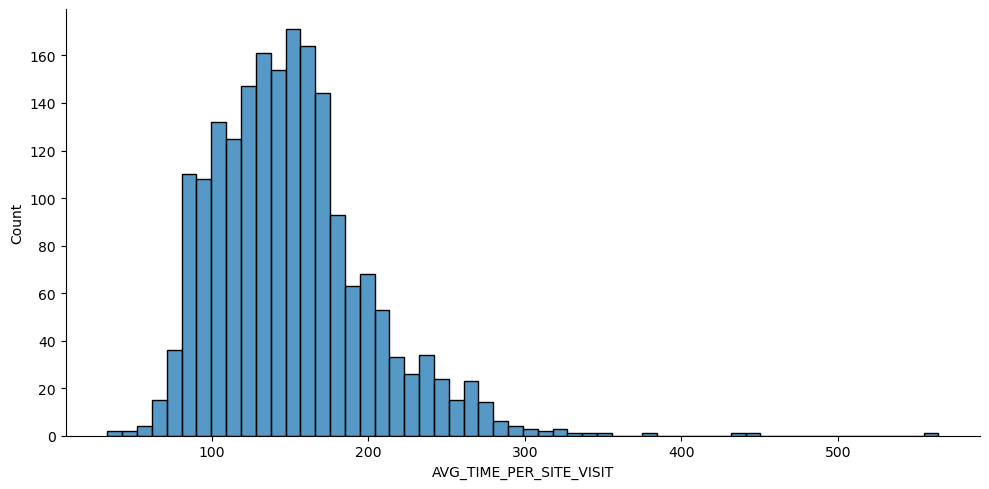

In [9]:
# developing a histogram using DISPLOT
# AVG_TIME_PER_SITE_VISIT
sns.displot(data   = cs,
            x      = 'AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)

# displaying the histogram
plt.show()

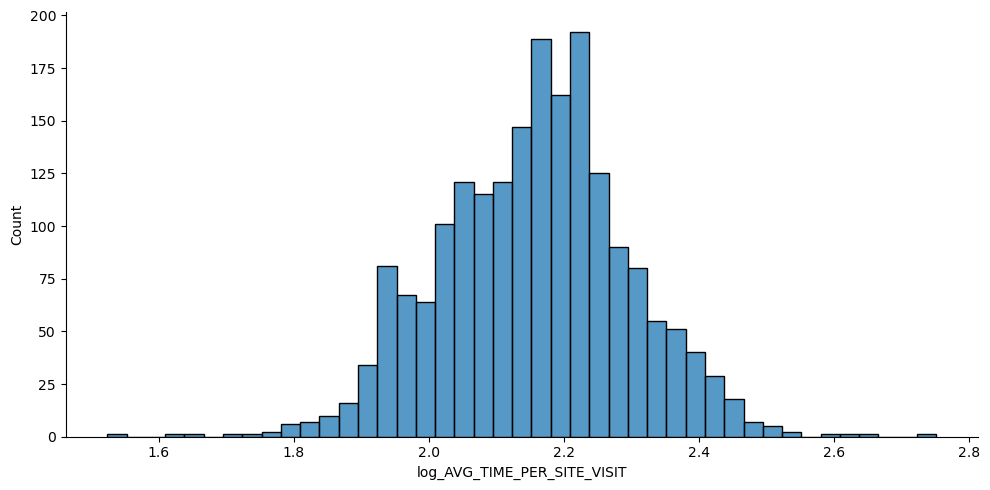

In [10]:
# log transforming and saving it to the dataset
cs['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(cs['AVG_TIME_PER_SITE_VISIT'])

# developing a histogram using DISPLOT
sns.displot(data   = cs,
            x      = 'log_AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

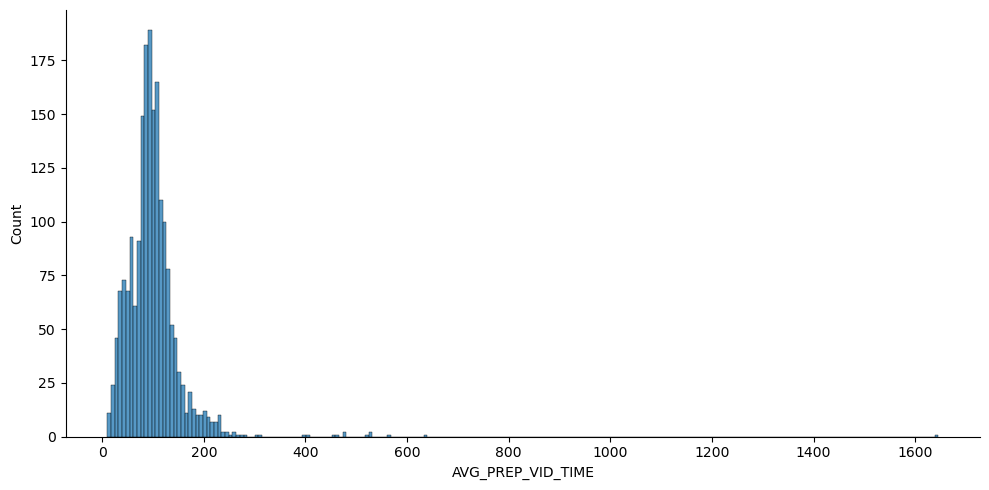

In [11]:
# developing a histogram using DISPLOT
# AVG_PREP_VID_TIME
sns.displot(data   = cs,
            x      = 'AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)




# displaying the histogram
plt.show()

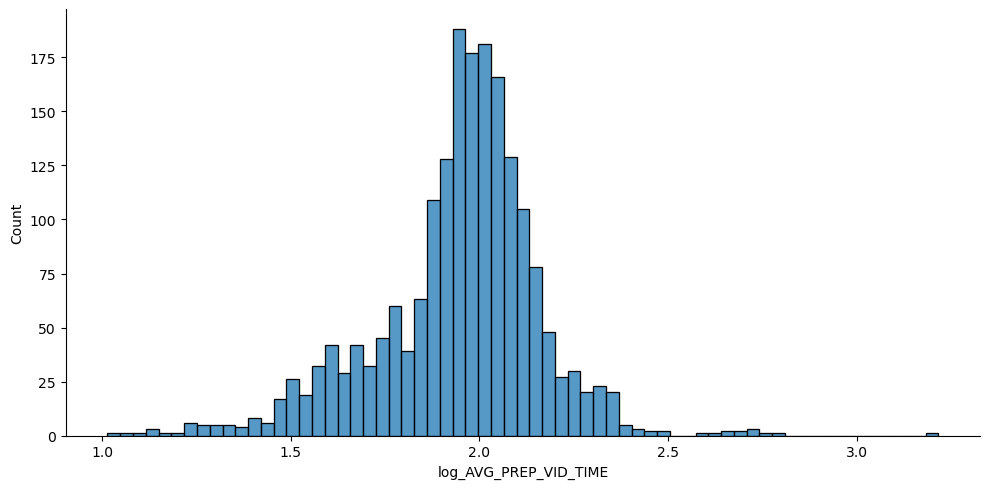

In [12]:
# log transforming and saving it to the dataset
cs['log_AVG_PREP_VID_TIME'] = np.log10(cs['AVG_PREP_VID_TIME'])

# developing a histogram using DISPLOT
sns.displot(data   = cs,
            x      = 'log_AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

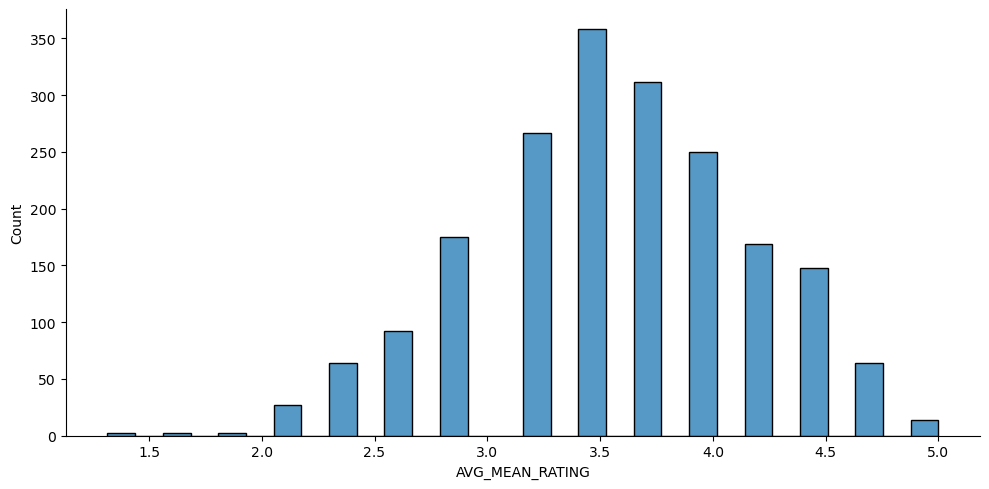

In [13]:
# developing a histogram using DISPLOT
# AVG_MEAN_RATING
sns.displot(data   = cs,
            x      = 'AVG_MEAN_RATING',
            height = 5,
            aspect = 2)




# displaying the histogram
plt.show()

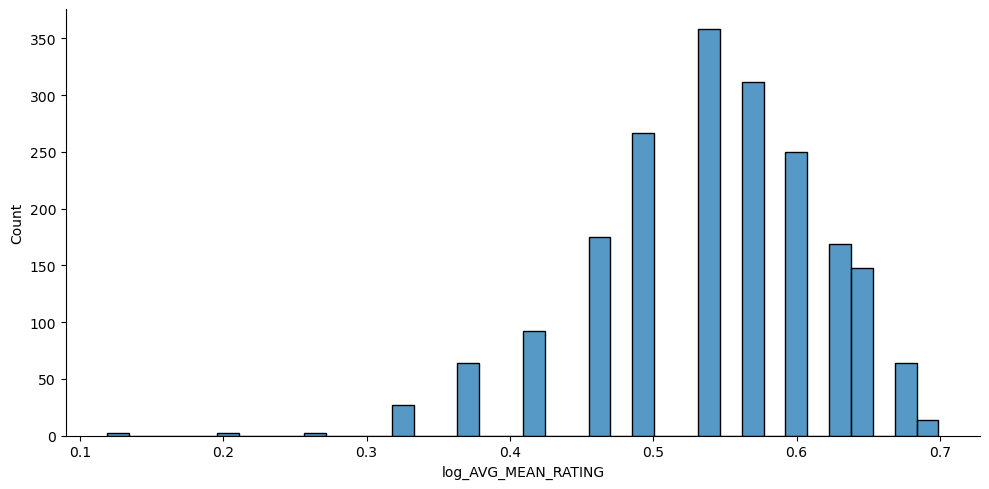

In [14]:
# log transforming and saving it to the dataset
cs['log_AVG_MEAN_RATING'] = np.log10(cs['AVG_MEAN_RATING'])

# developing a histogram using DISPLOT
sns.displot(data   = cs,
            x      = 'log_AVG_MEAN_RATING',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

As can be observed from the distribution above, AVG_TIME_PER_SITE_VISIT is skewed positive with outliers on the right side. After applying log transformation, the AVG_TIME_PER_SITE_VISIT variable tends to become more generally distributed than the original data. Also,  AVG_PREP_VID_TIME and AVG_PREP_VID_TIME were skewed positive. After applying log transformation, AVG_PREP_VID_TIME and AVG_PREP_VID_TIME variables become more normally distributed than the original data.

Checking the correlation between CROSS SELL SUCCESS and continuous variables.

In [15]:
# building a correlation matrix based on continuous features
cont_corr = cs.loc[ : , ['REVENUE',
                             'AVG_TIME_PER_SITE_VISIT',
                             'AVG_PREP_VID_TIME',
                             'AVG_MEAN_RATING',
                             'log_AVG_PREP_VID_TIME',
                             'log_REVENUE',
                             'log_AVG_TIME_PER_SITE_VISIT',
                             'log_AVG_MEAN_RATING',
                             'CROSS_SELL_SUCCESS']  ].corr(method = 'pearson')\
                                                     .round(decimals = 2)


# calculating the correlations between each continuous column and CROSS_SELL_SUCCESS
cont_corr.loc['CROSS_SELL_SUCCESS', : ].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
AVG_TIME_PER_SITE_VISIT        0.03
log_AVG_TIME_PER_SITE_VISIT    0.03
log_AVG_PREP_VID_TIME          0.02
AVG_PREP_VID_TIME              0.01
log_REVENUE                    0.01
REVENUE                        0.00
log_AVG_MEAN_RATING           -0.03
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

Continuous variables have weak correlation with CROSS_SELL_SUCCESS.

Analysising the correlation between the explanatory variables and the response variable (CROSS SELL SUCCESS).

In [16]:
# developing a correlation matrix
interval_corr = cs.drop(['REVENUE',
                             'AVG_TIME_PER_SITE_VISIT',
                             'AVG_PREP_VID_TIME',
                             'AVG_MEAN_RATING',
                             'log_AVG_PREP_VID_TIME',
                             'log_REVENUE',
                             'log_AVG_TIME_PER_SITE_VISIT',
                             'log_AVG_MEAN_RATING',], axis = 1)\
                    .corr(method = 'pearson')\
                    .round(decimals = 2)

# checking the correlations
interval_corr.loc['CROSS_SELL_SUCCESS', : ]\
                    .sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TOTAL_MEALS_ORDERED            0.01
TOTAL_PHOTOS_VIEWED            0.01
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
Name: CROSS_SELL_SUCCESS, dtype: float64

CANCELLATIONS_BEFORE_NOON

MOBILE_LOGINS

UNIQUE_MEALS_PURCH

PC_LOGINS

These variables have a Positive correlation  with the success of cross-selling promotion, will use some of them in feature engineering.

# Feature Engineering

In [17]:
# total number of logins
cs['Total_Logins'] = cs['MOBILE_LOGINS'] + cs['PC_LOGINS']

# printing value counts
print(f"""
--------------------------------
Total number of logins
--------------------------------
{cs['Total_Logins'].value_counts(normalize = False).sort_index()}

""")


--------------------------------
Total number of logins
--------------------------------
5     30
6    487
7    927
8    472
9     30
Name: Total_Logins, dtype: int64




In [18]:
# developing a correlation matrix
logins_corr = cs.loc[ : , ['PC_LOGINS',
                             'MOBILE_LOGINS',
                             'Total_Logins',
                             'CROSS_SELL_SUCCESS']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations
print(f"""
Total Logins
=================

-------------------------------
Total_Logins Correlations
-------------------------------
{logins_corr['CROSS_SELL_SUCCESS']}

""")


Total Logins

-------------------------------
Total_Logins Correlations
-------------------------------
PC_LOGINS             0.04
MOBILE_LOGINS         0.06
Total_Logins          0.07
CROSS_SELL_SUCCESS    1.00
Name: CROSS_SELL_SUCCESS, dtype: float64




Total_Logins have a Positive correlation with CROSS_SELL_SUCCESS.

In [19]:
# counting the number of zeroes

rev_zeroes         = len(cs['REVENUE'][cs["REVENUE"] == 0]) # REVENUE
tmo_zeroes         = len(cs['TOTAL_MEALS_ORDERED'][cs["TOTAL_MEALS_ORDERED"] == 0]) # TOTAL_MEALS_ORDERED 
purch_zeroes       = len(cs['UNIQUE_MEALS_PURCH'][cs["UNIQUE_MEALS_PURCH"] == 0]) # UNIQUE_MEALS_PURCH 
customer_zeroes    = len(cs['CONTACTS_W_CUSTOMER_SERVICE'][cs["CONTACTS_W_CUSTOMER_SERVICE"] == 0]) # CONTACTS_W_CUSTOMER_SERVICE 
pd_cat_zeroes      = len(cs['PRODUCT_CATEGORIES_VIEWED'][cs["PRODUCT_CATEGORIES_VIEWED"] == 0]) # PRODUCT_CATEGORIES_VIEWED
site_zeroes        = len(cs['AVG_TIME_PER_SITE_VISIT'][cs["AVG_TIME_PER_SITE_VISIT"] == 0]) # AVG_TIME_PER_SITE_VISIT
cancel_zeroes      = len(cs['CANCELLATIONS_AFTER_NOON'][cs["CANCELLATIONS_AFTER_NOON"] == 0]) # CANCELLATIONS_AFTER_NOON
pc_zeroes          = len(cs['PC_LOGINS'][cs["PC_LOGINS"] == 0]) # PC_LOGINS 
mobile_zeroes      = len(cs['MOBILE_LOGINS'][cs["MOBILE_LOGINS"] == 0]) # MOBILE_LOGINS
plan_zeroes        = len(cs['WEEKLY_PLAN'][cs["WEEKLY_PLAN"] == 0]) # WEEKLY_PLAN
late_dv_zeroes     = len(cs['LATE_DELIVERIES '][cs["LATE_DELIVERIES "] == 0]) # LATE_DELIVERIES
vid_zeroes         = len(cs['AVG_PREP_VID_TIME'][cs["AVG_PREP_VID_TIME"] == 0]) # AVG_PREP_VID_TIME
order_zeroes       = len(cs['LARGEST_ORDER_SIZE'][cs["LARGEST_ORDER_SIZE"] == 0]) # LARGEST_ORDER_SIZE 
rating_zeroes      = len(cs['AVG_MEAN_RATING'][cs["AVG_MEAN_RATING"] == 0]) # AVG_MEAN_RATING
photo_zeroes       = len(cs['TOTAL_PHOTOS_VIEWED'][cs["TOTAL_PHOTOS_VIEWED"] == 0]) # TOTAL_PHOTOS_VIEWED

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Revenue              | {rev_zeroes}\t\t{len(cs) - rev_zeroes}
Meals Ordered        | {tmo_zeroes}\t\t{len(cs) - tmo_zeroes}
Unique Meals         | {purch_zeroes}\t\t{len(cs) - purch_zeroes}
Customer Service     | {customer_zeroes}\t\t{len(cs) - customer_zeroes}
Product Categories   | {pd_cat_zeroes}\t\t{len(cs) - pd_cat_zeroes}
Site Visit           | {site_zeroes}\t\t{len(cs) - site_zeroes}
Cancellations        | {cancel_zeroes}\t\t{len(cs) - cancel_zeroes}
PC Logins            | {pc_zeroes}\t\t{len(cs) - pc_zeroes}
Mobile Logins        | {mobile_zeroes}\t\t{len(cs) - mobile_zeroes}
Weekly Plans         | {plan_zeroes}\t\t{len(cs) - plan_zeroes}
Late Delivery        | {late_dv_zeroes}\t\t{len(cs) - late_dv_zeroes}
Video Time           | {vid_zeroes}\t\t{len(cs) - vid_zeroes}
Largest Order        | {order_zeroes}\t\t{len(cs) - order_zeroes}
Ratings              | {rating_zeroes}\t\t{len(cs) - rating_zeroes}
Photos               | {photo_zeroes}\t\t{len(cs) - photo_zeroes} """)


                 No		Yes
               ---------------------
Revenue              | 0		1946
Meals Ordered        | 0		1946
Unique Meals         | 0		1946
Customer Service     | 0		1946
Product Categories   | 0		1946
Site Visit           | 0		1946
Cancellations        | 572		1374
PC Logins            | 0		1946
Mobile Logins        | 16		1930
Weekly Plans         | 468		1478
Late Delivery        | 1433		513
Video Time           | 0		1946
Largest Order        | 0		1946
Ratings              | 0		1946
Photos               | 0		1946 


Splitting Emails. It's crucial to divide the emails so that we may use them effectively in various groups. This will help us track down our consumers more effectively and gain more valuable information.

In [20]:
# placeholder list
email_lst = []

# looping over each email address
for index, col in cs.iterrows():
    
    # splitting email domain at '@'
    email_info = cs.loc[index,'EMAIL'].split(sep = '@')

    
    # appending placeholder_lst with the results
    email_lst.append(email_info)
    
# converting placeholder_lst into a DataFrame 
df_temp = pd.DataFrame(email_lst)

In [21]:
# checking results 
df_temp

,0,1
0,steffon.baratheon,yahoo.com
1,harlon.greyjoy,visa.com
2,monster,protonmail.com
3,damon.lannister.(lord),yahoo.com
4,raynald.westerling,jnj.com
...,...,...
1941,wat.(barleycorn),live.com
1942,hendry.bracken,exxon.com
1943,aenys.i.targaryen,passport.com
1944,leo.blackbar,pg.com


In [22]:
#Setting Personal, Professional and Junk Emails
personal      = ['@gmail.com',
                               '@yahoo.com',
                               '@protonmail.com']

professional                 = ['@mmm.com',
                               '@amex.com',
                               '@apple.com',
                               '@boeing.com',
                               '@caterpillar.com',
                               '@chevron.com',
                               '@cisco.com',
                               '@cocacola.com',
                               '@disney.com',
                               '@dupont.com',
                               '@exxon.com',
                               '@ge.org',
                               '@goldmansacs.com',
                               '@homedepot.com',
                               '@ibm.com',
                               '@intel.com',
                               '@jnj.com',
                               '@jpmorgan.com',
                               '@mcdonalds.com',
                               '@merck.com',
                               '@microsoft.com',
                               '@nike.com',
                               '@pfizer.com',
                               '@pg.com',
                               '@travelers.com',
                               '@unitedtech.com',
                               '@unitedhealth.com',
                               '@verizon.com',
                               '@visa.com',
                               '@walmart.com']

junk                        = ['@me.com',
                            '@aol.com',
                            '@hotmail.com',
                            '@live.com',
                            '@msn.com',
                            '@passport.com']

In [23]:
# placeholder list
email_lst2 = []


# looping to group observations by domain type
for domain in df_temp[1]:
        if '@' + domain in personal:
            email_lst2.append('personal')
            
        elif '@' + domain in professional:
            email_lst2.append('professional')
           
        elif '@' + domain in junk:
            email_lst2.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
cs['DOMAIN'] = pd.Series(email_lst2)

# checking results
cs['DOMAIN'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN, dtype: int64

In [24]:
# checking results
cs.head()

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_AVG_MEAN_RATING,Total_Logins,DOMAIN
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,3.691965,2.424228,2.138018,0.461609,7,personal
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,3.788875,2.392697,2.079904,0.420216,6,professional
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,3.535927,2.215902,2.103804,0.566344,7,personal
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,3.522444,2.245513,2.113208,0.499398,7,personal
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,3.534977,2.216430,1.536811,0.499398,7,professional


In [25]:
#Creating dummies for Emails
Dummy      = pd.get_dummies(cs['DOMAIN'])

In [26]:
cs        = cs.drop('EMAIL', axis = 1)
cs        = cs.drop('DOMAIN', axis = 1)

In [27]:
#joining column
cs        = cs.join([Dummy])

In [28]:
# checking results
cs

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_AVG_MEAN_RATING,Total_Logins,junk,personal,professional
0,1,4920.000,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,3.691965,2.424228,2.138018,0.461609,7,0,1,0
1,0,6150.000,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,3.788875,2.392697,2.079904,0.420216,6,0,0,1
2,0,3435.000,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,3.535927,2.215902,2.103804,0.566344,7,0,1,0
3,1,3330.000,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,3.522444,2.245513,2.113208,0.499398,7,0,1,0
4,1,3427.500,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,3.534977,2.216430,1.536811,0.499398,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,2940.000,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16,3.468347,2.155336,1.724276,0.461609,7,1,0,0
1942,1,7087.500,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302,3.850493,2.228913,1.591065,0.420216,8,0,0,1
1943,0,6562.500,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310,3.817069,2.272770,1.681241,0.420216,6,1,0,0
1944,1,5355.000,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275,3.728759,2.377488,1.491362,0.420216,7,0,0,1


Prepare train-test split for statsmodels.

In [29]:
# declaring explanatory variables
cs_data = cs.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
cs_target = cs['CROSS_SELL_SUCCESS']

In [30]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cs_data,
            cs_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cs_target) # preserving balance


# merging training data for statsmodels
cs_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [31]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ CANCELLATIONS_AFTER_NOON + 
                                        PC_LOGINS +
                                        MOBILE_LOGINS +
                                        Total_Logins +
                                        UNIQUE_MEALS_PURCH +
                                        professional""",
                           data    = cs_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.594776
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                     Logit                   Pseudo R-squared:      0.053     
Dependent Variable:        CROSS_SELL_SUCCESS      AIC:                   1747.5552 
Date:                      2023-03-03 23:42        BIC:                   1779.2682 
No. Observations:          1459                    Log-Likelihood:        -867.78   
Df Model:                  5                       LL-Null:               -916.19   
Df Residuals:              1453                    LLR p-value:           2.4575e-19
Converged:                 1.0000                  Scale:                 1.0000    
No. Iterations:            9.0000                                                   
------------------------------------------------------------------------------------
                          Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------------------------
Intercept                -1.9699      0.6145 -3.2059 0.0013      -3.1742     -0.7656
CANCELLATIONS_AFTER_NOON  0.2031      0.0397  5.1121 0.0000       0.1252      0.2810
PC_LOGINS                 0.0338 395651.2579  0.0000 1.0000 -775462.1822 775462.2497
MOBILE_LOGINS             0.1633 395651.2579  0.0000 1.0000 -775462.0527 775462.3792
Total_Logins              0.1970 395651.2579  0.0000 1.0000 -775462.0190 775462.4130
UNIQUE_MEALS_PURCH        0.0482      0.0253  1.9074 0.0565      -0.0013      0.0978
professional              0.8856      0.1288  6.8760 0.0000       0.6331      1.1380
====================================================================================

"""

In [32]:
for val in cs_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES  + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 log_REVENUE + 
 log_AVG_TIME_PER_SITE_VISIT + 
 log_AVG_PREP_VID_TIME + 
 log_AVG_MEAN_RATING + 
 Total_Logins + 
 junk + 
 personal + 
 professional + 


In [33]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                          REVENUE + 
                                          TOTAL_MEALS_ORDERED + 
                                          UNIQUE_MEALS_PURCH + 
                                          CONTACTS_W_CUSTOMER_SERVICE + 
                                          PRODUCT_CATEGORIES_VIEWED + 
                                          AVG_TIME_PER_SITE_VISIT + 
                                          CANCELLATIONS_AFTER_NOON + 
                                          PC_LOGINS + 
                                          MOBILE_LOGINS + 
                                          WEEKLY_PLAN +
                                          AVG_PREP_VID_TIME + 
                                          LARGEST_ORDER_SIZE + 
                                          AVG_MEAN_RATING + 
                                          TOTAL_PHOTOS_VIEWED + 
                                          log_REVENUE + 
                                          log_AVG_TIME_PER_SITE_VISIT + 
                                          log_AVG_PREP_VID_TIME + 
                                          log_AVG_MEAN_RATING + 
                                          Total_Logins + 
                                          junk + 
                                          personal + 
                                          professional """,
                                         data    = cs_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.566752
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
=======================================================================================
Model:                      Logit                    Pseudo R-squared:       0.097     
Dependent Variable:         CROSS_SELL_SUCCESS       AIC:                    1695.7830 
Date:                       2023-03-03 23:42         BIC:                    1806.7786 
No. Observations:           1459                     Log-Likelihood:         -826.89   
Df Model:                   20                       LL-Null:                -916.19   
Df Residuals:               1438                     LLR p-value:            1.8204e-27
Converged:                  1.0000                   Scale:                  1.0000    
No. Iterations:             7.0000                                                     
---------------------------------------------------------------------------------------
                             Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
---------------------------------------------------------------------------------------
Intercept                   -2.1156         nan     nan    nan          nan         nan
REVENUE                     -0.0002      0.0002 -1.0888 0.2762      -0.0006      0.0002
TOTAL_MEALS_ORDERED          0.0007      0.0015  0.4476 0.6544      -0.0022      0.0035
UNIQUE_MEALS_PURCH           0.0650      0.0294  2.2096 0.0271       0.0073      0.1226
CONTACTS_W_CUSTOMER_SERVICE  0.0255      0.0264  0.9658 0.3342      -0.0262      0.0772
PRODUCT_CATEGORIES_VIEWED   -0.0040      0.0200 -0.2027 0.8393      -0.0432      0.0351
AVG_TIME_PER_SITE_VISIT      0.0073      0.0063  1.1502 0.2501      -0.0051      0.0196
CANCELLATIONS_AFTER_NOON     0.2127      0.0413  5.1483 0.0000       0.1317      0.2937
PC_LOGINS                    0.0170 164217.8085  0.0000 1.0000 -321860.9732 321861.0072
MOBILE_LOGINS                0.1720 164217.8085  0.0000 1.0000 -321860.8182 321861.1622
WEEKLY_PLAN                  0.0000      0.0044  0.0080 0.9936      -0.0086      0.0086
AVG_PREP_VID_TIME           -0.0017      0.0024 -0.7025 0.4823      -0.0064      0.0030
LARGEST_ORDER_SIZE          -0.0714      0.0698 -1.0228 0.3064      -0.2081      0.0654
AVG_MEAN_RATING             -0.7857      0.7652 -1.0267 0.3045      -2.2855      0.7141
TOTAL_PHOTOS_VIEWED          0.0000      0.0004  0.0630 0.9498      -0.0008      0.0009
log_REVENUE                  0.4623      1.1805  0.3916 0.6954      -1.8514      2.7760
log_AVG_TIME_PER_SITE_VISIT -0.6290      2.1607 -0.2911 0.7710      -4.8639      3.6058
log_AVG_PREP_VID_TIME        0.2172      0.5961  0.3643 0.7156      -0.9512      1.3855
log_AVG_MEAN_RATING          5.4235      6.0361  0.8985 0.3689      -6.4070     17.2540
Total_Logins                 0.1890 164217.8085  0.0000 1.0000 -321860.8012 321861.1792
junk                        -1.7114         nan     nan    nan          nan         nan
personal                    -0.4324         nan     nan    nan          nan         nan
professional                 0.0281         nan     nan    nan          nan         nan
=======================================================================================

"""

In [34]:
#####################
# Sample Solution 1 #
#####################

# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ 
                                          CANCELLATIONS_AFTER_NOON + 
                                          log_AVG_TIME_PER_SITE_VISIT + 
                                          log_AVG_PREP_VID_TIME + 
                                          log_AVG_MEAN_RATING + 
                                          Total_Logins +  
                                          professional """,
                                    data = cs_train)

# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.595250
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit                Pseudo R-squared:   0.052     
Dependent Variable:    CROSS_SELL_SUCCESS   AIC:                1750.9404 
Date:                  2023-03-03 23:42     BIC:                1787.9390 
No. Observations:      1459                 Log-Likelihood:     -868.47   
Df Model:              6                    LL-Null:            -916.19   
Df Residuals:          1452                 LLR p-value:        2.2319e-18
Converged:             1.0000               Scale:              1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                   -2.5502   1.4140 -1.8034 0.0713 -5.3216 0.2213
CANCELLATIONS_AFTER_NOON     0.2064   0.0397  5.2054 0.0000  0.1287 0.2841
log_AVG_TIME_PER_SITE_VISIT  0.6102   0.4854  1.2573 0.2086 -0.3411 1.5615
log_AVG_PREP_VID_TIME       -0.1359   0.2768 -0.4910 0.6234 -0.6783 0.4066
log_AVG_MEAN_RATING         -0.4452   0.8511 -0.5230 0.6009 -2.1132 1.2229
Total_Logins                 0.2731   0.0750  3.6418 0.0003  0.1261 0.4201
professional                 0.8855   0.1288  6.8757 0.0000  0.6331 1.1379
==========================================================================

"""

Proportion of CROSS_SELL_SUCCESS in different campaigns. 

In [35]:
print(f"""
Proportion of CROSS_SELL_SUCCESS
============================
{cs['CROSS_SELL_SUCCESS'].value_counts(normalize = False).sort_index()}

""")


Proportion of CROSS_SELL_SUCCESS
0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64




In [36]:
# create explanatory variable sets
candidate_dict = {

 # original x-variables
 'logit_full'   :['REVENUE', 'TOTAL_MEALS_ORDERED', 
                 'UNIQUE_MEALS_PURCH', 
                 'CONTACTS_W_CUSTOMER_SERVICE',
                 'PRODUCT_CATEGORIES_VIEWED',
                 'AVG_TIME_PER_SITE_VISIT', 
                 'CANCELLATIONS_AFTER_NOON',
                 'PC_LOGINS',
                 'MOBILE_LOGINS',
                 'WEEKLY_PLAN',
                 'AVG_PREP_VID_TIME',
                 'LARGEST_ORDER_SIZE',
                 'AVG_MEAN_RATING',
                 'TOTAL_PHOTOS_VIEWED'],
    
 # significant variables only (set 1)
 'logit_sig1'    : ['MOBILE_LOGINS',
                    'AVG_MEAN_RATING','PC_LOGINS' ,'CANCELLATIONS_AFTER_NOON'],
    
 # significant variables only (set 2)
 'logit_sig2'    : ['CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS',
                    'personal', 'professional'],}

# defining explanatory variable set to run in the models
key_to_run = 'logit_sig2'

In [37]:
# train/test split with the full model
cs_data   =  cs.loc[ : , candidate_dict['logit_full']]
cs_target =  cs.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cs_data,
            cs_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = cs_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1.4,
                            warm_start= True,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.6785
LogReg Testing  ACCURACY: 0.6776
LogReg Train-Test Gap   : 0.0009


/Users/tanginaparvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[  0 156]
 [  1 330]]


In [39]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 0
False Positives: 156
False Negatives: 1
True Positives : 330



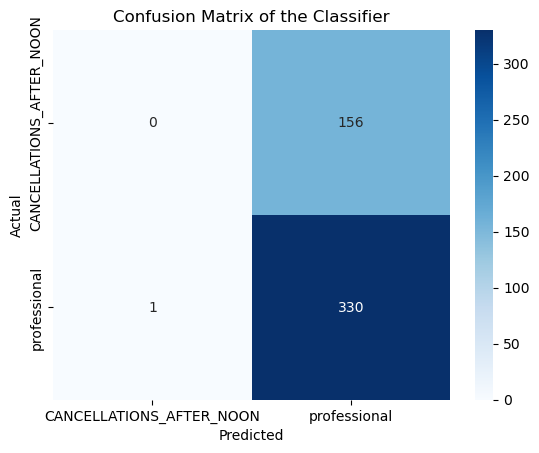

In [40]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['CANCELLATIONS_AFTER_NOON', 'professional'])

In [41]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.4985


In [42]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.538
Full Tree AUC Score: 0.4754


# Classification Modeling

In [43]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

In [44]:
# dropping categorical variables after they've been encoded and irrelevant
cs = cs.drop(['CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT',], axis = 1)


In [45]:
# checking the results
cs.columns

Index(['CROSS_SELL_SUCCESS', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_PREP_VID_TIME', 'log_AVG_MEAN_RATING', 'Total_Logins', 'junk', 'personal', 'professional'], dtype='object')

Applying value counts to Response The proportion of successful vs unsuccessful campaigns is a variable that may be understood.

In [46]:
print(f"""
Proportion of CROSS_SELL_SUCCESS
============================
{cs['CROSS_SELL_SUCCESS'].value_counts(normalize = False).sort_index()}

""")


Proportion of CROSS_SELL_SUCCESS
0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64




In [47]:
#Correlation analysis between the explanatory variables and the response variable.
df_corr = cs.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
professional                   0.19
CANCELLATIONS_AFTER_NOON       0.14
Total_Logins                   0.07
MOBILE_LOGINS                  0.06
personal                       0.04
PC_LOGINS                      0.04
UNIQUE_MEALS_PURCH             0.04
log_AVG_TIME_PER_SITE_VISIT    0.03
LARGEST_ORDER_SIZE             0.02
LATE_DELIVERIES                0.02
log_AVG_PREP_VID_TIME          0.02
log_REVENUE                    0.01
TOTAL_MEALS_ORDERED            0.01
TOTAL_PHOTOS_VIEWED            0.01
AVG_PREP_VID_TIME              0.01
REVENUE                        0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
log_AVG_MEAN_RATING           -0.03
AVG_MEAN_RATING               -0.04
junk                          -0.28
Name: CROSS_SELL_SUCCESS, dtype: float64

Creating a dictionary to store candidate models.

In [48]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig1']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED']


First Significant p-value Model:
--------------------------------
['MOBILE_LOGINS', 'AVG_MEAN_RATING', 'PC_LOGINS', 'CANCELLATIONS_AFTER_NOON']


Second Significant p-value Model:
---------------------------------
['CANCELLATIONS_AFTER_NOON', 'MOBILE_LOGINS', 'personal', 'professional']



In [49]:
# declaring explanatory variables
cs_data   = cs.loc[ : , candidate_dict[key_to_run] ]

# declaring response variable
cs_target = cs.loc[ : , 'CROSS_SELL_SUCCESS']

Prepare train-test split for statsmodels.


In [50]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cs_data,
            cs_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cs_target)


# merging training data for statsmodels
cs_train = pd.concat([x_train, y_train], axis = 1)

In [51]:
#Print explanatory variables to copy to the models
for val in cs_data:
    print(f" {val} + ")

 CANCELLATIONS_AFTER_NOON + 
 MOBILE_LOGINS + 
 personal + 
 professional + 


In [52]:
 # instantiating a logistic regression model object
logistic_sig2 = smf.logit(formula = """CROSS_SELL_SUCCESS ~
                                         CANCELLATIONS_AFTER_NOON + 
                                         MOBILE_LOGINS + 
                                         personal + 
                                         professional""", 
                           data    = cs_train)


# fitting the model object
results_sig2 = logistic_sig2.fit()


# checking the results SUMMARY
results_sig2.summary()

Optimization terminated successfully.
         Current function value: 0.573267
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1454
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                 0.08710
Time:                        23:42:22   Log-Likelihood:                -836.40
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.787e-33
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.2049      0.217     -5.554      0.000      -1.630      -0.780
CANCELLATIONS_AFTER_NOON     0.2155      0.041      5.278      0.000       0.135       0.296
MOBILE_LOGINS                0.3513      0.113      3.103      0.002       0.129       0.573
personal                     1.2514      0.150      8.319      0.000       0.957       1.546
professional                 1.7100      0.164     10.454      0.000       1.389       2.031
============================================================================================
"""

Logistic Regression with Hyperparameter Tuning.

In [53]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = np.arange(0.1, 5.0, 0.1)   # similar to alpha in lasso regression but inverse => lower C will try to help us select sig variables
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']

# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}

# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1200)

# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 500,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False))# scoring criteria (AUC)

# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(cs_data, cs_target)

# PREDICT step is not needed

# printing the optimal parameters and best score
print("Tuned Parameters: ", lr_tuned_cv.best_params_)
print("Tuned CV AUC: ", lr_tuned_cv.best_score_.round(4))

/Users/tanginaparvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 294 is smaller than n_iter=500. Running 294 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters:  {'warm_start': True, 'solver': 'newton-cg', 'C': 0.4}
Tuned CV AUC:  0.6202


Checking the best estimator for the model.

In [54]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=0.4, max_iter=1200, random_state=219, solver='newton-cg',
                   warm_start=True)

In [55]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7231
LR Tuned Testing  ACCURACY: 0.7228
LR Tuned AUC Score        : 0.6215


Unpack the confusion matrix.

In [56]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 53
False Positives: 103
False Negatives: 32
True Positives : 299



Store the model results.

In [57]:
# declaring model performance objects
lr_train_acc = lr_tuned_train_score
lr_test_acc  = lr_tuned_test_score
lr_auc       = lr_tuned_auc

# Classification Trees (CART Models)


In [58]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances for CART model
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

Creating dictionary of explanatory variable sets for CART models.

In [59]:
# create explanatory variable sets

candidate_dict_CART = {

    # original x-variables
    'original_CART': [
        'REVENUE',
        'TOTAL_MEALS_ORDERED',
        'UNIQUE_MEALS_PURCH',
        'CANCELLATIONS_AFTER_NOON',
        'PC_LOGINS',
        'MOBILE_LOGINS',
        'WEEKLY_PLAN',
        'AVG_PREP_VID_TIME',
        'LARGEST_ORDER_SIZE',
        'AVG_MEAN_RATING'
    ],

    # significant variables only (set 1)
    'logit_sig1': [
        'PRODUCT_CATEGORIES_VIEWED']}

# defining explanatory variable set to run in the models
key_to_run_CART = 'original_CART'

In [60]:
# declaring explanatory variables
cs_data_CART = cs.loc[:, candidate_dict_CART[key_to_run_CART]]

Prepare train-test split.

In [61]:
# train-test split with stratification
x_train_CART, x_test_CART, y_train_CART, y_test_CART = train_test_split(
            cs_data_CART,
            cs_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cs_target)


# merging training data for statsmodels
cs_train_CART = pd.concat([x_train_CART, y_train_CART], axis = 1)

Hyperparameter Tuning on Classification Trees.

In [62]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 8, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree_CART = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_CART_cv = RandomizedSearchCV(estimator        = tuned_tree_CART,
                                   param_distributions   = param_grid,
                                   cv                    = 3,   
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_CART_cv.fit(cs_data_CART, cs_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_CART_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_CART_cv.best_score_.round(4))

/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/1142073231.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  depth_space     = pd.np.arange(1, 8, 1)
/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/1142073231.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 35, 'max_depth': 6, 'criterion': 'entropy'}
Tuned Training AUC: 0.5376


With the results of the hyperparameter tweaking, create a classification tree model.

In [63]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned_CART = tuned_tree_CART_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_CART_pred = tree_tuned_CART.predict(x_test_CART)


# SCORING the results
print('Training ACCURACY:', tree_tuned_CART.score(x_train_CART, y_train_CART).round(4))
print('Testing  ACCURACY:', tree_tuned_CART.score(x_test_CART, y_test_CART).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_CART,
                                          y_score = tree_tuned_CART_pred).round(4))


# saving scoring data for future use
tree_tuned_CART_train_score = tree_tuned_CART.score(x_train_CART, y_train_CART).round(4) # accuracy
tree_tuned_CART_test_score  = tree_tuned_CART.score(x_test_CART, y_test_CART).round(4)   # accuracy


# saving the AUC score
tree_tuned_CART_auc         = roc_auc_score(y_true  = y_test_CART,
                                     y_score = tree_tuned_CART_pred).round(4) # auc


Training ACCURACY: 0.6991
Testing  ACCURACY: 0.6797
AUC Score        : 0.539


In [64]:
# unpacking the confusion matrix
tuned_tree_CART_tn, \
tuned_tree_CART_fp, \
tuned_tree_CART_fn, \
tuned_tree_CART_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_CART_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_CART_tn}
False Positives: {tuned_tree_CART_fp}
False Negatives: {tuned_tree_CART_fn}
True Positives : {tuned_tree_CART_tp}
""")


True Negatives : 23
False Positives: 133
False Negatives: 23
True Positives : 308



Using the dictionary's candidate models, construct a classification tree model.

In [65]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier(max_depth=8, random_state=219)

# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)

# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)

# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train, y_train).round(4))
print('Full Tree Testing ACCURACY:', full_tree_fit.score(x_test, y_test).round(4))
print('Full Tree AUC Score:', roc_auc_score(y_true=y_test, y_score=full_tree_pred).round(4))

# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score = full_tree_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
full_tree_auc_score = roc_auc_score(y_true=y_test, y_score=full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.7341
Full Tree Testing ACCURACY: 0.7248
Full Tree AUC Score: 0.6146


In [66]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred ).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 48
False Positives: 108
False Negatives: 26
True Positives : 305



In [67]:
# plotting feature importance
plot_feature_importances(full_tree_fit,
                         train  = x_train,
                         export = False)

/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/3629681362.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  plt.yticks(pd.np.arange(n_features), train.columns)


Create a new classification tree model to prune the tree.

In [68]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 50,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7245
Testing  ACCURACY: 0.7228
AUC Score        : 0.6198


In [69]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 31
True Positives : 300



Hyperparameter Tuning on Classification Trees.

In [70]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,    
                                   n_iter                = 1500,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(cs_data, cs_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/2611757762.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  depth_space     = pd.np.arange(1, 25, 1)
/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/2611757762.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 54, 'max_depth': 2, 'criterion': 'entropy'}
Tuned Training AUC: 0.6202


In [71]:
#Check the best estimator for the model

tuned_tree_cv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 54,
 'max_depth': 2,
 'criterion': 'entropy'}

In [72]:
# Build a classification tree model based on the hyperparameter tuning results.

# INSTANTIATING a classification tree object with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7121
Testing  ACCURACY: 0.7125
AUC Score        : 0.6225


In [73]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 58
False Positives: 98
False Negatives: 42
True Positives : 289



In [74]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)

Scale the explanatory data and create a KNN classification model with optimal neighbors.

In [75]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(cs_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(cs_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            cs_target,
            random_state = 219,
            test_size = 0.25,
            stratify = cs_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 19)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.6861
Testing  ACCURACY: 0.7023
AUC Score        : 0.6403


/Users/tanginaparvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tanginaparvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

In [76]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 73
False Positives: 83
False Negatives: 62
True Positives : 269



Using RandomizedSearchCV, optimize the random forest's hyperparameters.

In [77]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(max_depth    = 8,
                                     random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                                        cv         = 3,
                                        n_iter     = 1000,
                                        scoring    = make_scorer(roc_auc_score,
                                   needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(cs_data, cs_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/3317191593.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  estimator_space  = pd.np.arange(100, 1100, 250)
/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/3317191593.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  leaf_space       = pd.np.arange(1, 31, 10)
/Users/tanginaparvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.6158


In [78]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=219,
                       warm_start=True)

Creating tuned random forest model based on hyperparameter tuning results.

In [79]:
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap      =False , 
                                      ccp_alpha      =0.0 , 
                                      class_weight   =None ,
                                      criterion      ='entropy',
                                      max_depth      =8 , 
                                      max_features   ='auto',
                                      max_leaf_nodes =None , 
                                      max_samples    =None ,
                                      min_impurity_decrease  =0.0 , 
                                      min_samples_leaf=11 , 
                                      min_samples_split=2 ,
                                      min_weight_fraction_leaf=0.0, 
                                      n_estimators=350,
                                      n_jobs=None, 
                                      oob_score=False, 
                                      random_state=219,
                                      verbose=0, 
                                      warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7286
Forest Tuned Testing  ACCURACY: 0.7269
Forest Tuned AUC Score        : 0.6127


In [80]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/3629681362.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  plt.yticks(pd.np.arange(n_features), train.columns)


In [81]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 46
False Positives: 110
False Negatives: 23
True Positives : 308



Save the tweaked random forest model's output in model performance for further use.

In [82]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)

 Build a gradient boosting classifier model with the hyperparameters tuning.

In [83]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 4.0, 0.2)
estimator_space    = pd.np.arange(100, 200, 5)
depth_space        = pd.np.arange(1, 8, 1)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 900,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(cs_data, cs_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/258157216.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  learn_space        = pd.np.arange(0.1, 4.0, 0.2)
/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/258157216.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  estimator_space    = pd.np.arange(100, 200, 5)
/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_69647/258157216.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  depth_space        = pd.np.arange(1, 8, 1)


Tuned Parameters  : {'warm_start': False, 'n_estimators': 175, 'max_depth': 1, 'learning_rate': 1.3000000000000003}
Tuned Training AUC: 0.6193


In [84]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=1.3000000000000003, max_depth=1,
                           n_estimators=175, random_state=219)

In [95]:
# INSTANTIATING the model object without hyperparameters

# hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, 
                                       criterion='friedman_mse', 
                                       init=None,
                                       learning_rate=0.5000000000000001, 
                                       loss='deviance',
                                       max_depth=1, 
                                       max_features=None, 
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, 
                                       min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, 
                                       n_estimators=180,
                                       n_iter_no_change=None, 
                                       random_state=219, 
                                       subsample=1.0, tol=0.0001,
                                       validation_fraction=0.1, 
                                       verbose=0,
                                       warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.73
Testing  ACCURACY: 0.7269
AUC Score        : 0.6229


In [96]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 29
True Positives : 302



In [93]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)

# Comparing Results

In [97]:
model_performance.iloc[ 3 , :  ]

NameError: name 'model_performance' is not defined

The "Tuned Tree" model has a training accuracy of 0.7121 and a testing accuracy of 0.7125. The AUC score for this model is 0.6225, which indicates that the model has a fair discrimination performance. The confusion matrix shows that the model correctly classified 289 out of 331 observations in the testing set, with 58 false negatives and 98 false positives.